# **Mobile Price Prediction Project**

---

## Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

##Reading The Data

In [2]:
df=pd.read_csv('Mobilephone_data_final - ndtv_data_final.csv',index_col ='Sr. No.')
df.head()

,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,RAM (MB),...,Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
Sr. No.,,,,,,,,,,,,,,,,,,,,,
0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,Yes,1440,3120,8,12000,...,48.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,58998
1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,Yes,1080,2400,8,6000,...,64.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,27999
2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,3969,6.50,Yes,1242,2688,6,4000,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,106900
3,iPhone 11,Apple,iPhone 11,3110,6.10,Yes,828,1792,6,4000,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,62900
4,LG G8X ThinQ,LG,G8X ThinQ,4000,6.40,Yes,1080,2340,8,6000,...,12.0,32.0,Android,Yes,Yes,Yes,1,No,No,49990


In [3]:
# Checking Columns
df.columns

Index(['Name', 'Brand', 'Model', 'Battery capacity (mAh)',
       'Screen size (inches)', 'Touchscreen', 'Resolution x', 'Resolution y',
       'Processor', 'RAM (MB)', 'Internal storage (GB)', 'Rear camera',
       'Front camera', 'Operating system', 'Wi-Fi', 'Bluetooth', 'GPS',
       'Number of SIMs', '3G', '4G/ LTE', 'Price'],
      dtype='object')

In [4]:
# Getting info about our data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1358
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    1359 non-null   object 
 1   Brand                   1359 non-null   object 
 2   Model                   1359 non-null   object 
 3   Battery capacity (mAh)  1359 non-null   int64  
 4   Screen size (inches)    1359 non-null   float64
 5   Touchscreen             1359 non-null   object 
 6   Resolution x            1359 non-null   int64  
 7   Resolution y            1359 non-null   int64  
 8   Processor               1359 non-null   int64  
 9   RAM (MB)                1359 non-null   int64  
 10  Internal storage (GB)   1359 non-null   float64
 11  Rear camera             1359 non-null   float64
 12  Front camera            1359 non-null   float64
 13  Operating system        1359 non-null   object 
 14  Wi-Fi                   1359 non-null   objec

In [5]:
# Performing a small descriptive statistics on numerical Columns
df.describe()

,Battery capacity (mAh),Screen size (inches),Resolution x,Resolution y,Processor,RAM (MB),Internal storage (GB),Rear camera,Front camera,Number of SIMs,Price
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,2938.489330,5.291310,811.543046,1490.777778,5.551141,2488.777778,30.654864,12.070199,7.037969,1.833701,11465.825607
std,873.514133,0.671357,270.707271,557.780120,2.196562,1664.440386,36.950241,8.948337,6.295448,0.374457,13857.497077
min,1010.000000,2.400000,240.000000,320.000000,1.000000,64.000000,0.064000,0.000000,0.000000,1.000000,494.000000
25%,2300.000000,5.000000,720.000000,1280.000000,4.000000,1000.000000,8.000000,8.000000,2.000000,2.000000,4763.500000
50%,3000.000000,5.200000,720.000000,1280.000000,4.000000,2000.000000,16.000000,12.200000,5.000000,2.000000,6999.000000
75%,3500.000000,5.700000,1080.000000,1920.000000,8.000000,3000.000000,32.000000,13.000000,8.000000,2.000000,11999.000000
max,6000.000000,7.300000,2160.000000,3840.000000,10.000000,12000.000000,512.000000,108.000000,48.000000,3.000000,174990.000000


##Cleaning The Data

In [6]:
# Dropping Unnecessay Columns from the data
df1=df.drop(['Name','Model','Screen size (inches)','Resolution x', 'Resolution y'],axis=1)
df1

,Brand,Battery capacity (mAh),Touchscreen,Processor,RAM (MB),Internal storage (GB),Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
Sr. No.,,,,,,,,,,,,,,,,
0,OnePlus,4085,Yes,8,12000,256.000,48.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,58998
1,Realme,4000,Yes,8,6000,64.000,64.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,27999
2,Apple,3969,Yes,6,4000,64.000,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,106900
3,Apple,3110,Yes,6,4000,64.000,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,62900
4,LG,4000,Yes,8,6000,128.000,12.0,32.0,Android,Yes,Yes,Yes,1,No,No,49990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,Intex,1500,Yes,4,512,8.000,5.0,0.3,Android,Yes,Yes,Yes,2,Yes,No,2599
1355,Videocon,2000,Yes,4,1000,8.000,8.0,5.0,Android,Yes,Yes,Yes,2,Yes,No,2940
1356,Intex,1700,Yes,2,512,4.000,5.0,2.0,Android,Yes,Yes,No,2,Yes,No,2999


In [7]:
# Checking Null Values
df.isnull().sum()

Name                      0
Brand                     0
Model                     0
Battery capacity (mAh)    0
Screen size (inches)      0
Touchscreen               0
Resolution x              0
Resolution y              0
Processor                 0
RAM (MB)                  0
Internal storage (GB)     0
Rear camera               0
Front camera              0
Operating system          0
Wi-Fi                     0
Bluetooth                 0
GPS                       0
Number of SIMs            0
3G                        0
4G/ LTE                   0
Price                     0
dtype: int64

In [8]:
# Checking Duplicate values in dataset
df.duplicated().sum()

0

In [9]:
# Separating Numerical Data from Dataset
num_df=df[['Battery capacity (mAh)','Processor', 'RAM (MB)', 'Internal storage (GB)', 'Rear camera','Front camera', 'Number of SIMs','Price']]

<Axes: >

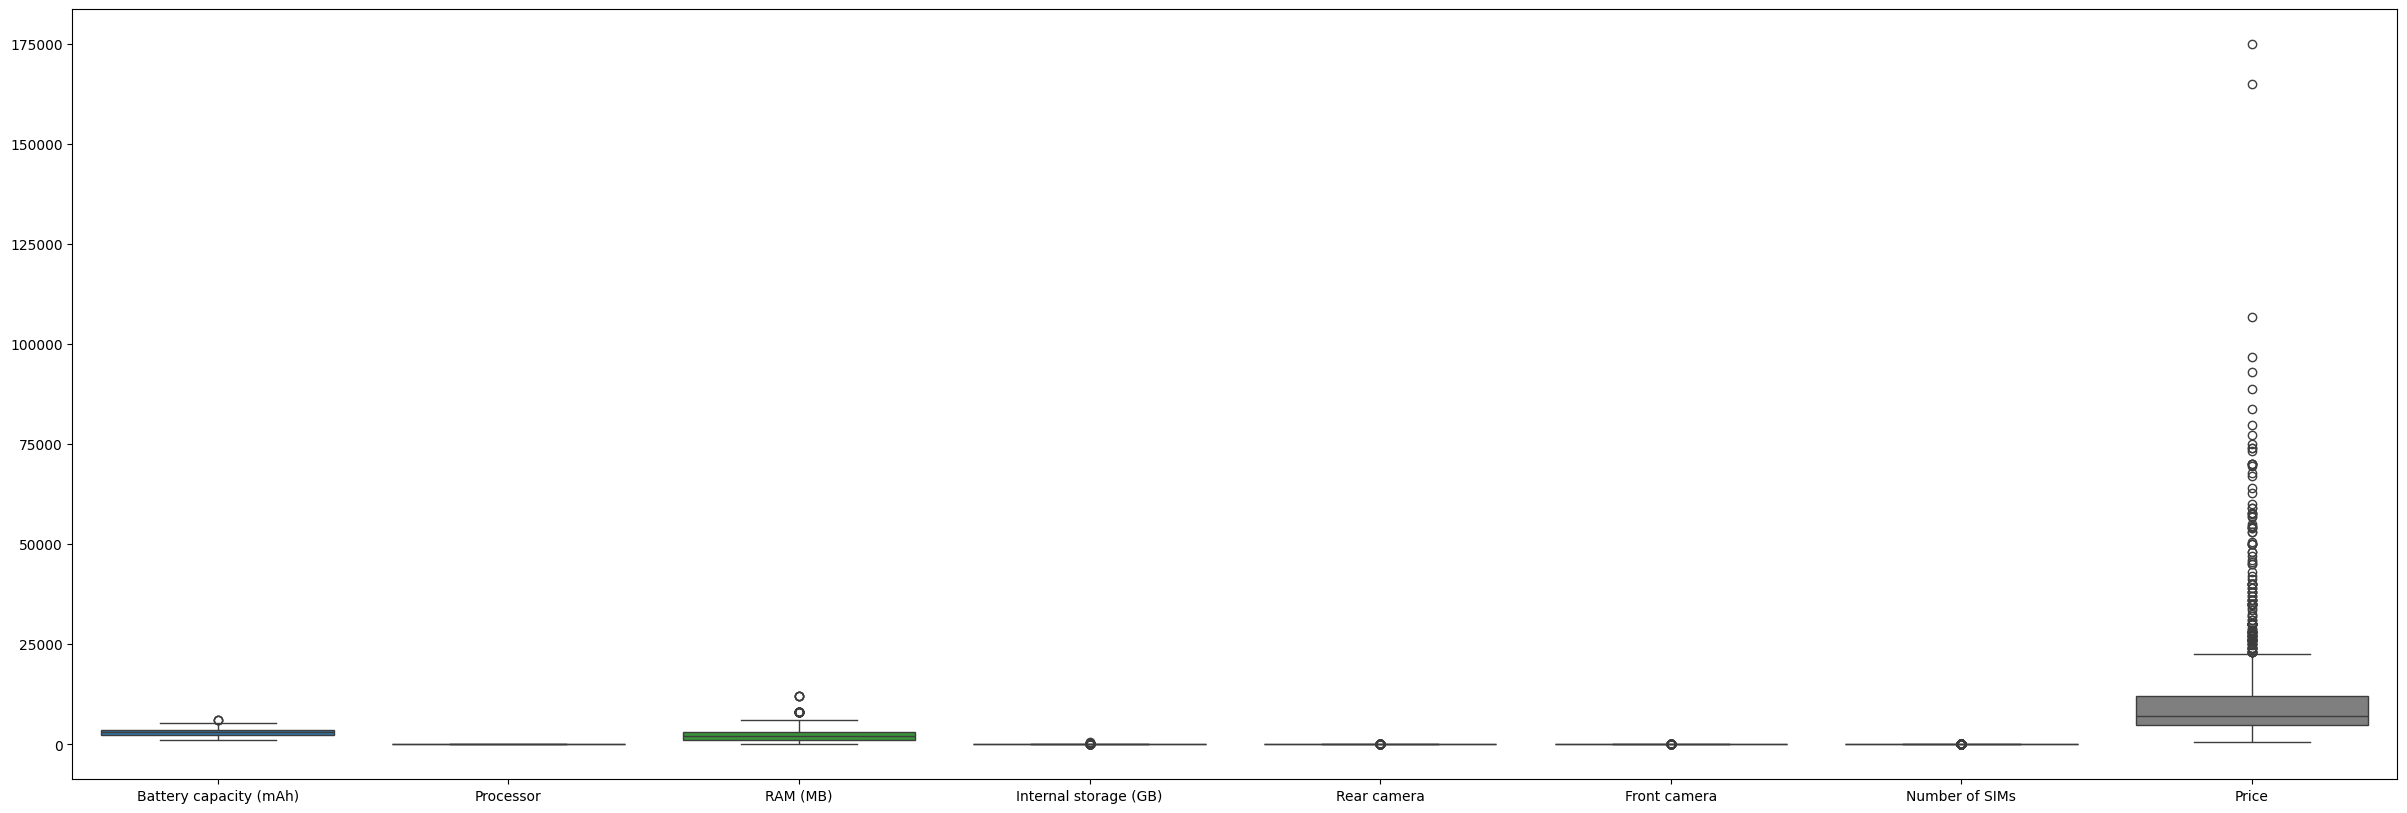

In [10]:
plt.figure(figsize=(30,10))
sns.boxplot(num_df)

## Data Insights

In [11]:
num_df.corr()

,Battery capacity (mAh),Processor,RAM (MB),Internal storage (GB),Rear camera,Front camera,Number of SIMs,Price
Battery capacity (mAh),1.000000,0.538017,0.600969,0.483489,0.499756,0.540250,0.040151,0.297525
Processor,0.538017,1.000000,0.615097,0.481688,0.468668,0.556287,0.039891,0.302492
RAM (MB),0.600969,0.615097,1.000000,0.847864,0.661602,0.696881,-0.023896,0.613446
Internal storage (GB),0.483489,0.481688,0.847864,1.000000,0.572591,0.613574,-0.015116,0.644079
Rear camera,0.499756,0.468668,0.661602,0.572591,1.000000,0.639652,-0.038466,0.379120
Front camera,0.540250,0.556287,0.696881,0.613574,0.639652,1.000000,0.054066,0.310672
Number of SIMs,0.040151,0.039891,-0.023896,-0.015116,-0.038466,0.054066,1.000000,-0.162491
Price,0.297525,0.302492,0.613446,0.644079,0.379120,0.310672,-0.162491,1.000000


<Axes: >

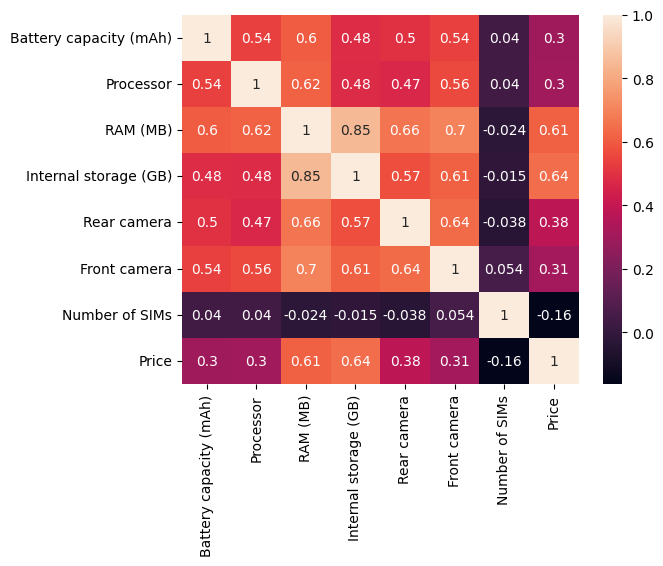

In [12]:
# Heatmap for numerical data
sns.heatmap(num_df.corr(),annot=True)

In [13]:
df.Touchscreen.value_counts()

Touchscreen
Yes    1342
No       17
Name: count, dtype: int64

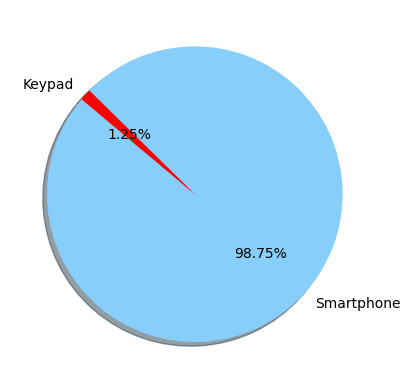

In [14]:
# PieChart for Users Using Touchscreen and Keypad
plt.pie(df.Touchscreen.value_counts(),labels=['Smartphone', 'Keypad'],colors=['lightskyblue','red'],autopct='%.2f%%', shadow=True, startangle=140)
plt.show()

Text(0.5, 1.0, 'Scatterplot between Processor and Ram')

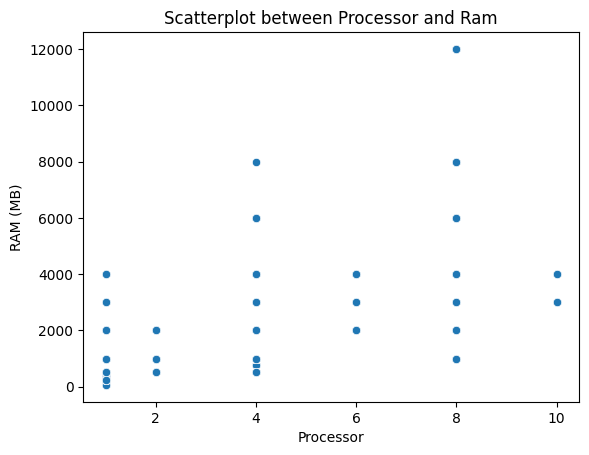

In [15]:
# Scatter Plot between Processor and Ram
sns.scatterplot(x='Processor', y='RAM (MB)',data=df)
plt.title('Scatterplot between Processor and Ram')

Text(0.5, 1.0, 'Internal Storage (GB)')

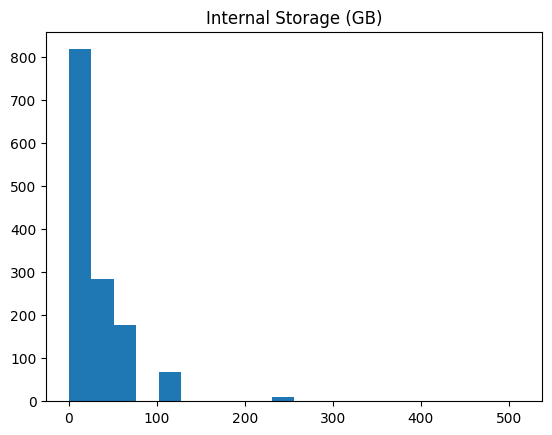

In [16]:
# Histogram for Internal Storage
plt.hist(df['Internal storage (GB)'],bins=20)
plt.title('Internal Storage (GB)')

<Axes: title={'center': 'RAM (MB)'}, ylabel='Frequency'>

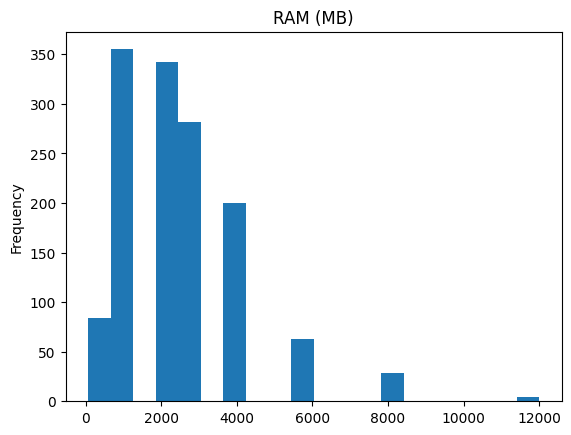

In [17]:
# Histogram for Ram
df['RAM (MB)'].plot(kind='hist', bins=20, title='RAM (MB)')

<Axes: title={'center': 'Operating System'}, xlabel='Operating system'>

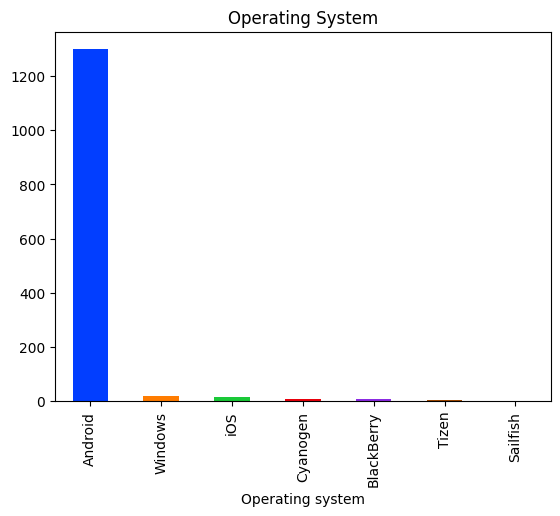

In [18]:
# Bargraph for Operating System
colors=sns.color_palette('bright')
df['Operating system'].value_counts().plot(kind="bar",color=colors,title='Operating System')

<Axes: title={'center': 'Processor'}, ylabel='Frequency'>

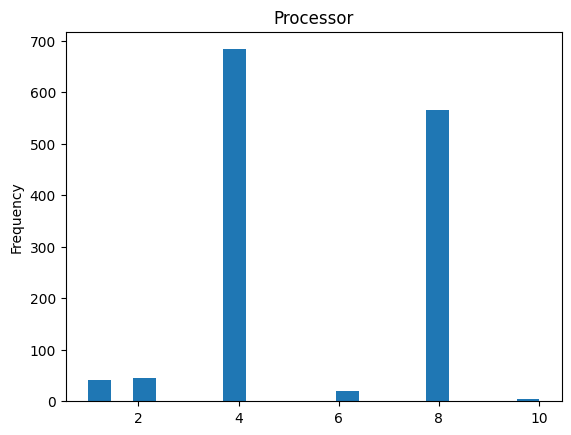

In [19]:
# Histogram for Processor
df['Processor'].plot(kind='hist', bins=20, title='Processor')


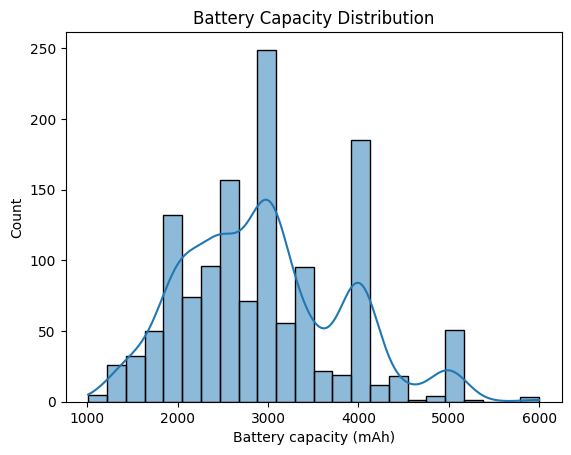

In [20]:
sns.histplot(data=df, x='Battery capacity (mAh)', kde=True)
plt.title('Battery Capacity Distribution')
plt.show()


C:\Users\Priyanshu Gupta\AppData\Local\Temp\ipykernel_11172\2738584097.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Brand',data=df,palette="Accent")


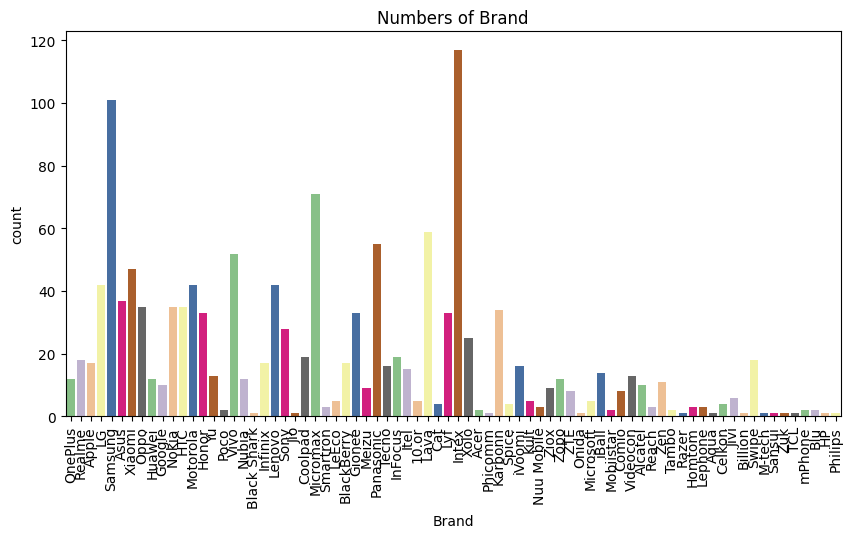

In [21]:
# Countplot for Brand
plt.figure(figsize=(10,5))
sns.countplot(x='Brand',data=df,palette="Accent")
plt.title("Numbers of Brand")
plt.xticks(rotation=90)
plt.show()

In [22]:
# Top 10 Selling Smartphone according to Data
df.Brand.value_counts()[0:10]

Brand
Intex        117
Samsung      101
Micromax      71
Lava          59
Panasonic     55
Vivo          52
Xiaomi        47
LG            42
Lenovo        42
Motorola      42
Name: count, dtype: int64

C:\Users\Priyanshu Gupta\AppData\Local\Temp\ipykernel_11172\2679505821.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Operating system",y='Battery capacity (mAh)',data=df,palette="Accent")


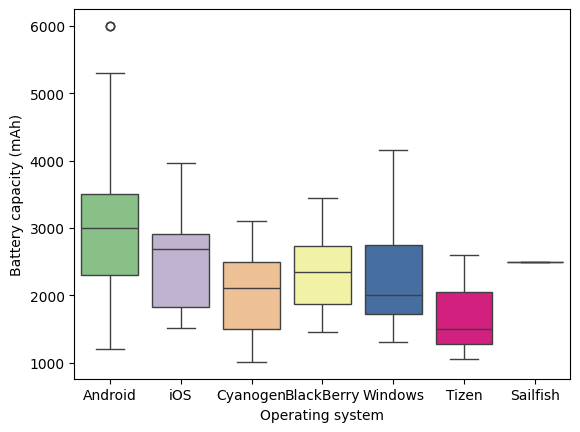

In [23]:
sns.boxplot(x="Operating system",y='Battery capacity (mAh)',data=df,palette="Accent")
plt.show()

In [24]:
# The average selling price of each brand
df.groupby('Brand')['Price'].mean().sort_values(ascending=False)

Brand
HP         88719.000000
Razer      54990.000000
Apple      45510.470588
Cat        45219.750000
Huawei     38564.750000
               ...     
Tambo       3595.000000
Phicomm     3238.000000
Philips     3199.000000
Reach       2529.666667
Jio         1249.000000
Name: Price, Length: 76, dtype: float64

## Spliting the dependent and independent variables

In [25]:
df1

,Brand,Battery capacity (mAh),Touchscreen,Processor,RAM (MB),Internal storage (GB),Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
Sr. No.,,,,,,,,,,,,,,,,
0,OnePlus,4085,Yes,8,12000,256.000,48.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,58998
1,Realme,4000,Yes,8,6000,64.000,64.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,27999
2,Apple,3969,Yes,6,4000,64.000,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,106900
3,Apple,3110,Yes,6,4000,64.000,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,62900
4,LG,4000,Yes,8,6000,128.000,12.0,32.0,Android,Yes,Yes,Yes,1,No,No,49990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,Intex,1500,Yes,4,512,8.000,5.0,0.3,Android,Yes,Yes,Yes,2,Yes,No,2599
1355,Videocon,2000,Yes,4,1000,8.000,8.0,5.0,Android,Yes,Yes,Yes,2,Yes,No,2940
1356,Intex,1700,Yes,2,512,4.000,5.0,2.0,Android,Yes,Yes,No,2,Yes,No,2999


In [26]:
# Specify the target variable and predictor(s)
x= df.drop(columns=['Battery capacity (mAh)','Price']).values # Independent or predictors variables
y=df.Price.values  # Dependent or target variable
print(pd.DataFrame(x))
pd.DataFrame(y)

                                  0         1                       2     3   \
0     OnePlus 7T Pro McLaren Edition   OnePlus  7T Pro McLaren Edition  6.67   
1                      Realme X2 Pro    Realme                  X2 Pro   6.5   
2                  iPhone 11 Pro Max     Apple       iPhone 11 Pro Max   6.5   
3                          iPhone 11     Apple               iPhone 11   6.1   
4                       LG G8X ThinQ        LG               G8X ThinQ   6.4   
...                              ...       ...                     ...   ...   
1354                   Intex Aqua A2     Intex                 Aqua A2   4.0   
1355     Videocon Infinium Z51 Nova+  Videocon      Infinium Z51 Nova+   5.0   
1356                   Intex Aqua Y4     Intex                 Aqua Y4   4.5   
1357                 iBall Andi4 B20     iBall               Andi4 B20   4.0   
1358             iBall Andi Avonte 5     iBall           Andi Avonte 5   5.0   

       4     5     6  7      8      9  

,0
0,58998
1,27999
2,106900
3,62900
4,49990
...,...
1354,2599
1355,2940
1356,2999
1357,2498


In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(sparse_output=False),[0,1,2,4,12,13,14,15,17,18])],remainder='passthrough')

x=np.array(ct.fit_transform(x))
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,...,2774,2775,2776,2777,2778,2779,2780,2781,2782,2783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,6.67,1440,3120,8,12000,256.0,48.0,16.0,2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,6.5,1080,2400,8,6000,64.0,64.0,16.0,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,6.5,1242,2688,6,4000,64.0,12.0,12.0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,6.1,828,1792,6,4000,64.0,12.0,12.0,2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,6.4,1080,2340,8,6000,128.0,12.0,32.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,480,800,4,512,8.0,5.0,0.3,2
1355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,480,854,4,1000,8.0,8.0,5.0,2
1356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.5,480,854,2,512,4.0,5.0,2.0,2
1357,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,480,800,1,256,0.512,2.0,0.3,2


In [28]:
#spliting the Dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [29]:
x_train,x_test

(array([[0.0, 0.0, 0.0, ..., 13.0, 8.0, 2],
        [0.0, 0.0, 0.0, ..., 8.0, 5.0, 2],
        [0.0, 0.0, 0.0, ..., 13.2, 5.0, 2],
        ...,
        [0.0, 0.0, 0.0, ..., 13.0, 2.1, 1],
        [0.0, 0.0, 0.0, ..., 13.0, 8.0, 2],
        [0.0, 0.0, 0.0, ..., 13.0, 8.0, 2]], dtype=object),
 array([[0.0, 0.0, 0.0, ..., 13.0, 16.0, 2],
        [0.0, 0.0, 0.0, ..., 12.0, 8.0, 2],
        [0.0, 0.0, 0.0, ..., 13.0, 8.0, 1],
        ...,
        [0.0, 0.0, 0.0, ..., 8.0, 3.2, 2],
        [0.0, 0.0, 0.0, ..., 13.0, 5.0, 2],
        [0.0, 0.0, 0.0, ..., 13.0, 8.0, 2]], dtype=object))

In [30]:
y_train,y_test

(array([ 6999,  4970,  3990, ..., 42021, 11499,  4999], dtype=int64),
 array([ 6319,  7332,  7450,  5900,  3999,  3599, 13895,  5990,  2199,
         4790, 39995,  4200,  4999,  7499,  6449,  7040,  5499,  2499,
         5499,  5899,  2984,  8500,  6600,  3899,  7499,  8999,  6800,
        15999, 13690,  4790,  7490,  3499,  4690,  3539, 16999,  2999,
         5300,  3799,  4999, 10450,  5935,  4829,  8490,  5990,  5499,
         8999, 15995,  4999, 12900,  2359,  3199,  7999,  5199,  5899,
        34930,  4490, 13999,  2999,  6999,  8990,  2699,  5999, 39999,
         4488,  4970,  4610,  5990,  1999,  4880,  7999, 11999,  3099,
         3450,  6999,  6999,  6999,  6499,  3949, 14999,  5999, 19990,
        34999,  5999,  8891,  2499, 13990,  6990, 25999,  5999,  4599,
         4295, 10999,  9999,  6999,  2190,  3299,  3990,  3999,  4790,
         5935, 23990,  5850,  4499,  9990,  2499,  7499, 23990,  8499,
         6999,  3579,  3399,  3590,  3890,  5000,  4690, 29990, 18000,
       

In [31]:
# Standard Scaling

from sklearn.preprocessing import StandardScaler
stm=StandardScaler()
x_train=stm.fit_transform(x_train)
x_test=stm.transform(x_test)

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
reg=LinearRegression()

In [34]:
reg.fit(x_train,y_train)

LinearRegression()

In [35]:
y_pred=reg.predict(x_test)
y_pred

array([12356.93198351, 10063.26272532, 11299.35789712,  7387.18185885,
        4699.37767965,  3881.21309364,  8624.9812636 ,  6986.26960054,
        2713.65199038,  5776.00086459, 31442.70131245,  5683.18227293,
        8397.05759331,  7079.53243992,  9010.87878094, 11084.55768031,
        5119.13144856,  3783.77788426,  4431.35055006,  9213.57236934,
        3067.40953295, 10410.89099653,  5663.7905853 ,  7469.78974536,
        8701.87981468, 14931.44784822, 12535.96469223, 27116.21627835,
       23280.32354535,  8547.77014363,  5054.60639427,  6418.05811518,
        4641.07305609, 10777.34010874, 17081.99957818,  4265.20457994,
        7480.15858391,  6136.82315315,  9675.28483772, 10489.10817333,
        9739.39961025,  8194.28910637,  6823.43577985,  9290.79060064,
        9287.11243   , 13996.01119892, 16468.16356609,  8389.54109467,
       17051.79422123,  2943.9431018 ,  6872.47091037, 14139.69325798,
        4491.552661  , 10177.82335364, 29078.67927734,  5139.41714133,
      

In [36]:
from sklearn import metrics

In [37]:
metrics.mean_absolute_error(y_pred,y_test)

4208.208320641667

In [38]:
metrics.mean_squared_error(y_test,y_pred)

38222040.8011316

In [39]:
metrics.r2_score(y_test,y_pred)

0.6102273241408303

In [40]:
import joblib
y_prediction=[]
for i in range(x_test.shape[0]):
    check_data=x_test[i,0:]
    joblib.dump(reg,'Linear_regression_model.pkl')
    new_data=check_data.reshape(1,-1)
    model=joblib.load('Linear_regression_model.pkl')
    prediction=model.predict(new_data)
    y_prediction.append(prediction)

In [41]:
y_actual=[]
for i in range(y_test.shape[0]):
    y_actual.append(y_test[i])

In [42]:
A=pd.Series(y_actual)
B=pd.Series(y_prediction)

In [43]:
pd.concat([A,B],axis=1).rename(columns={0:'Actual_Values',1:'Predicted_Values'})

,Actual_Values,Predicted_Values
0,6319,[12356.931983511804]
1,7332,[10063.262725320119]
2,7450,[11299.357897116926]
3,5900,[7387.181858845719]
4,3999,[4699.377679646773]
...,...,...
267,9999,[12241.103352595017]
268,29950,[21363.957335832372]
269,3279,[7267.514450274477]
270,8490,[9357.358701522528]


## KNN Algorithm

In [44]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Separate target variable and features
X = df.drop(columns=['Price'])

y = df['Price']

Ct = ColumnTransformer(transformers=[
        ('num', StandardScaler(), ["Screen size (inches)","Resolution x","Resolution y","Processor","RAM (MB)","Internal storage (GB)","Rear camera","Front camera","Number of SIMs"]),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ["Name","Brand","Model","Touchscreen","Operating system","Wi-Fi","Bluetooth","GPS","3G","4G/ LTE"])
    ])

# Apply the transformations
X_preprocessed = Ct.fit_transform(X)

# Initialize the KNN model
knn = KNeighborsRegressor(n_neighbors=5)

# Fit the model
knn.fit(X_preprocessed, y)

# Predict
y_pred_knn = knn.predict(X_preprocessed)

# Calculate evaluation metrics
rmse_knn = mean_squared_error(y, y_pred_knn, squared=False)
mae_knn = mean_absolute_error(y, y_pred_knn)
r2_knn = r2_score(y, y_pred_knn)

# Print evaluation metrics
print(f'RMSE: {rmse_knn}')
print(f'MAE: {mae_knn}')
print(f'R-squared: {r2_knn}')

RMSE: 7239.19252640233
MAE: 3442.490360559235
R-squared: 0.7268945611109539


C:\Users\Priyanshu Gupta\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [45]:
import joblib
y_prediction=[]
for i in range(X_preprocessed.shape[0]):
    check_data=X_preprocessed[i,0:]
    joblib.dump(knn,'KNeighborsRegressor_model.pkl')
    new_data=check_data.reshape(1,-1)
    model=joblib.load('KNeighborsRegressor_model.pkl')
    prediction=model.predict(new_data)
    y_prediction.append(prediction)

In [46]:
y_actual=[]
for i in range(y.shape[0]):
    y_actual.append(y[i])

In [47]:
A=pd.Series(y_actual)
B=pd.Series(y_prediction)

In [48]:
pd.concat([A,B],axis=1).rename(columns={0:'Actual_Values',1:'Predicted_Values'})

,Actual_Values,Predicted_Values
0,58998,[56179.4]
1,27999,[16999.0]
2,106900,[79339.6]
3,62900,[74439.6]
4,49990,[26593.6]
...,...,...
1354,2599,[2969.2]
1355,2940,[3828.6]
1356,2999,[3877.4]
1357,2498,[2687.0]
